In [1]:
from keras import layers, models, optimizers

2024-06-14 11:41:45.495479: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-14 11:41:46.013703: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-14 11:41:46.013742: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-06-14 11:41:46.094146: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-14 11:41:47.214939: W tensorflow/stream_executor/platform/de

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
dataset_dir = '/home/mukesh/ml_dl_ds/deep_learning_algorithm/dataset'

In [4]:
import os

In [5]:
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'test')

In [6]:
def get_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation = 'relu'))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    
    model.compile(
        optimizer = optimizers.RMSprop(learning_rate = 1e-4),
        loss = 'binary_crossentropy',
        metrics = ['acc']
    )
    
    return model

In [7]:
model = get_model()

2024-06-14 11:41:48.632376: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-06-14 11:41:48.632662: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-06-14 11:41:48.632684: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mukesh-ThinkPad-E14): /proc/driver/nvidia/version does not exist
2024-06-14 11:41:48.633239: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
train_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [10]:
val_gen = ImageDataGenerator(
    rescale = 1./255
)

In [11]:
train_data_generator = train_gen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [12]:
val_data_generator = val_gen.flow_from_directory(
    val_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [13]:
history = model.fit(
    train_data_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = val_data_generator,
    validation_steps = 50
    
)

Epoch 1/100
100/100 [==============================] - 43s 421ms/step - loss: 0.6931 - acc: 0.5115 - val_loss: 0.6864 - val_acc: 0.5330
Epoch 2/100
100/100 [==============================] - 45s 452ms/step - loss: 0.6820 - acc: 0.5570 - val_loss: 0.6831 - val_acc: 0.5540
Epoch 3/100
100/100 [==============================] - 45s 447ms/step - loss: 0.6693 - acc: 0.5840 - val_loss: 0.6661 - val_acc: 0.5880
Epoch 4/100
100/100 [==============================] - 44s 443ms/step - loss: 0.6603 - acc: 0.6115 - val_loss: 0.6692 - val_acc: 0.6040
Epoch 5/100
100/100 [==============================] - 45s 445ms/step - loss: 0.6462 - acc: 0.6165 - val_loss: 0.6535 - val_acc: 0.6250
Epoch 6/100
100/100 [==============================] - 45s 446ms/step - loss: 0.6341 - acc: 0.6270 - val_loss: 0.7614 - val_acc: 0.5540
Epoch 7/100
100/100 [==============================] - 45s 446ms/step - loss: 0.6184 - acc: 0.6460 - val_loss: 0.6068 - val_acc: 0.6860
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 46s 461ms/step - loss: 0.4461 - acc: 0.7985 - val_loss: 0.5238 - val_acc: 0.7670
Epoch 62/100
100/100 [==============================] - 46s 462ms/step - loss: 0.4377 - acc: 0.7880 - val_loss: 0.5254 - val_acc: 0.7700
Epoch 63/100
100/100 [==============================] - 46s 463ms/step - loss: 0.4263 - acc: 0.7995 - val_loss: 0.5059 - val_acc: 0.7790
Epoch 64/100
100/100 [==============================] - 46s 460ms/step - loss: 0.4265 - acc: 0.8020 - val_loss: 0.4743 - val_acc: 0.7970
Epoch 65/100
100/100 [==============================] - 46s 460ms/step - loss: 0.4280 - acc: 0.8050 - val_loss: 0.4569 - val_acc: 0.7930
Epoch 66/100
100/100 [==============================] - 46s 462ms/step - loss: 0.4255 - acc: 0.8135 - val_loss: 0.4660 - val_acc: 0.7840
Epoch 67/100
100/100 [==============================] - 46s 461ms/step - loss: 0.4314 - acc: 0.8005 - val_loss: 0.5056 - val_acc: 0.7640
Epoch 68/100
100/100 [===================

In [14]:
hist = history.history

In [15]:
import matplotlib.pyplot as plt

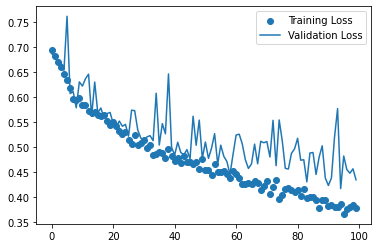

In [16]:
plt.scatter(range(len(hist['loss'])), hist['loss'], label = 'Training Loss')
plt.plot(range(len(hist['val_loss'])), hist['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

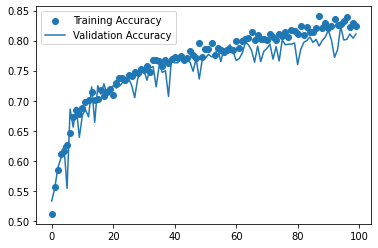

In [17]:
plt.scatter(range(len(hist['acc'])), hist['acc'], label = 'Training Accuracy')
plt.plot(range(len(hist['val_acc'])), hist['val_acc'], label = 'Validation Accuracy')
plt.legend()
plt.show()